<a href="https://colab.research.google.com/github/Jai-Muruganantham/Bank-management-system/blob/master/First_AML_MP1_Jaisankar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a id='main' name="main"></a>
# Viral Data Analysis

Date: 2021.10.15

Author: © 2021 [Murugannatham Jaisankar](https://www.linkedin.com/in/jaimuruganantham/) 

This notebook is part of an individual project for [KTU IF](https://fi.ktu.edu/)  [P176M010 Advanced Machine Learning](https://admissions.ktu.edu/programme/m-software-engineering/#P176M010) class led by [M. Lukoševičius](http://mantas.info/).

Here we analyze open COVID-19 data from [Our World in Data](https://ourworldindata.org/) to answer the following questions:

1. [1. What is the correlation between female and male smokers in Asia and Europe?](#Q1)
1. ~[Question 2?](#Q2)~
1. ~[Question 3?](#Q3)~

We additionally uses data from:
* https://data.humdata.org/dataset/open_one_time_covid_education_impact#metadata-0



This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International license</a>. <a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons licencija" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/80x15.png" /></a> 

## Load the data

In [ ]:
import numpy as np
import numpy.ma as ma
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Download the data to cache locally. Do this once (a day), and comment out, not to DoS the server. (adopted from https://stackoverflow.com/a/35997720).

In [ ]:
import requests
fname = 'owid-covid-data.csv'
url = 'https://covid.ourworldindata.org/data/' + fname
r = requests.get(url)
open(fname, 'wb').write(r.content)

34016412

Load the file to Pandas.

In [ ]:
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
# download the file locally when developing, not to DoS the server:
#url = "owid-covid-data.csv" 
df_Smokers = pd.read_csv(url, parse_dates=[3])
url="https://data.humdata.org/dataset/ad5456ed-7fe5-4512-ac59-0a051d604954/resource/8b0deb33-d6b9-4115-a0d1-3ccad389321c/download/open_one_time_covid_education_impact.csv"
df_Education=pd.read_csv(url, parse_dates=[3])

In [ ]:
df_Smokers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123984 entries, 0 to 123983
Data columns (total 65 columns):
 #   Column                                   Non-Null Count   Dtype         
---  ------                                   --------------   -----         
 0   iso_code                                 123984 non-null  object        
 1   continent                                118361 non-null  object        
 2   location                                 123984 non-null  object        
 3   date                                     123984 non-null  datetime64[ns]
 4   total_cases                              117336 non-null  float64       
 5   new_cases                                117332 non-null  float64       
 6   new_cases_smoothed                       116318 non-null  float64       
 7   total_deaths                             106463 non-null  float64       
 8   new_deaths                               106616 non-null  float64       
 9   new_deaths_smoothed       

The columns are explained [here](https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-codebook.csv).

~Loading other data, general (not particular question related) computations, observations go in here, as many cells as necessary.~

~For example, basic statistics of all the columns can be computed by:~

In [ ]:
df_Smokers.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,1.173360e+05,117332.000000,116318.000000,1.064630e+05,106616.000000,116318.000000,116719.000000,116715.000000,115706.00000,105859.000000,106012.000000,115706.000000,99616.000000,15197.000000,15197.000000,17342.000000,17342.000000,1276.000000,1276.000000,2100.000000,2100.000000,5.320200e+04,5.331900e+04,53319.000000,53202.000000,6.408000e+04,64080.000000,60174.000000,59533.000000,2.921600e+04,2.777100e+04,2.465300e+04,3.359000e+03,2.422200e+04,5.242200e+04,29216.000000,27771.000000,24653.000000,3359.000000,52422.000000,103238.000000,1.231110e+05,114518.000000,109292.000000,108080.000000,108694.000000,109948.000000,73606.000000,109574.000000,113025.000000,85382.000000,84144.000000,55148.000000,99613.000000,117594.000000,109663.000000,4494.000000,4494.000000,4494.000000,4494.000000
mean,1.478163e+06,6455.865962,6476.367837,3.723036e+04,144.450758,131.787972,18335.726508,84.192149,84.23550,381.188297,1.577236,1.434871,1.002561,879.082121,21.680101,4047.429016,154.401760,211.146073,16.493218,2968.853969,81.264291,5.548326e+04,1.103213e+07,466.758040,2.468446,5.185423e+04,2.352280,0.086982,160.233961,7.257132e+07,3.886762e+07,2.551317e+07,1.503968e+06,8.104550e+05,3.871635e+05,46.446032,27.514845,21.111030,2.109265,3479.456717,56.826576,1.219937e+08,395.945846,30.508761,8.750550,5.536659,19240.848182,13.493006,259.823279,8.019556,10.591357,32.740820,50.892826,3.030972,73.258420,0.726387,29717.778238,8.240681,15.502345,723.937534
std,9.873892e+06,39252.132224,38851.546004,2.217164e+05,787.574201,737.566125,30969.747831,195.269784,164.68065,639.951471,4.167213,3.095828,0.344895,2824.957660,24.551481,11430.977025,208.800974,492.538368,31.040982,10423.568206,137.534896,1.935224e+05,4.635788e+07,1134.900992,6.551060,1.741954e+05,5.609243,0.096418,849.141783,4.089345e+08,2.265010e+08,1.551432e+08,4.211653e+06,3.766066e+06,2.542322e+06,46.948828,24.988919,22.359535,5.795652,4285.933173,20.652668,6.752404e+08,1845.585513,9.117153,6.187506,4.219738,20041.624259,19.988319,119.802382,4.280992,10.504650,13.507815,31.825836,2.457313,7.536112,0.150080,84270.522270,15.763349,31.220916,1111.831698
min,1.000000e+00,-74347.000000,-6223.000000,1.000000e+00,-1918.000000,-232.143000,0.001000,-3125.829000,-272.97100,0.001000,-143.838000,-18.968000,-0.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.700000e+01,0.137000,15.100000,1.144000,0.526000,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000,-31959.40

In [ ]:
df_Smokers.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.126,0.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [ ]:
df_Education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4789 entries, 0 to 4788
Data columns (total 27 columns):
 #   Column                                                                  Non-Null Count  Dtype 
---  ------                                                                  --------------  ----- 
 0   submission_id                                                           4789 non-null   int64 
 1   submission_date                                                         4789 non-null   object
 2   gender                                                                  4789 non-null   object
 3   age                                                                     4789 non-null   object
 4   geography                                                               4789 non-null   object
 5   financial_situation                                                     4789 non-null   object
 6   education                                                               4789 non-null   

In [ ]:
df_Education.describe()

,submission_id,are_there_children_0_to_2_yrs_out_of_educational_system,were_children_3_to_17_yrs_enrolled_and_did_not_return_to_school,are_there_children_who_stopped_enrolling_in_primary_education,are_there_children_who_stopped_enrolling_in_secondary_education,are_children_attending_face_to_face_classes,can_children_observe_deterioration_of_basic_services_of_school,are_children_3_to_17_yrs_dealing_with_irregular_school_activity,are_children_being_teached_by_unqualified_people,did_teachers_leave_the_educational_system,do_school_and_the_teachers_have_internet_connection,do_children_have_internet_connection,do_children_3_to_17_yrs_miss_virtual_class_due_to_lack_of_electricity,does_home_shows_severe_deficit_of_electricity,does_home_shows_severe_deficit_of_internet,do_children_3_to_17_yrs_miss_class_or_in_lower_grade,are_children_promoted_with_a_modality_different_from_formal_evaluation
count,4.789000e+03,4789.000000,4789.000000,4789.000000,4789.000000,4789.000000,4789.000000,4789.000000,4789.000000,4789.000000,4789.000000,4789.000000,4789.000000,4789.000000,4789.000000,4789.000000,4789.000000
mean,5.631341e+15,0.298392,0.610984,0.209229,0.197327,0.171017,0.801211,0.637711,0.316141,0.664231,0.559407,0.630194,0.667572,0.283358,0.583003,0.252454,0.433076
std,6.457765e+14,0.457600,0.487578,0.406801,0.398023,0.376563,0.399130,0.480712,0.465017,0.472308,0.496510,0.482802,0.471133,0.450676,0.493114,0.434465,0.495553
min,4.503608e+15,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.077568e+15,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.637464e+15,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,6.182794e+15,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,6.755339e+15,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df_Education.head()

,submission_id,submission_date,gender,age,geography,financial_situation,education,employment_status,submission_state,are_there_children_0_to_2_yrs_out_of_educational_system,were_children_3_to_17_yrs_enrolled_and_did_not_return_to_school,are_there_children_who_stopped_enrolling_in_primary_education,are_there_children_who_stopped_enrolling_in_secondary_education,are_children_attending_face_to_face_classes,can_children_observe_deterioration_of_basic_services_of_school,do_children_3_and_17_yrs_receive_regular_school_meals,are_there_teachers_at_scheduled_class_hours,are_children_3_to_17_yrs_dealing_with_irregular_school_activity,are_children_being_teached_by_unqualified_people,did_teachers_leave_the_educational_system,do_school_and_the_teachers_have_internet_connection,do_children_have_internet_connection,do_children_3_to_17_yrs_miss_virtual_class_due_to_lack_of_electricity,does_home_shows_severe_deficit_of_electricity,does_home_shows_severe_deficit_of_internet,do_children_3_to_17_yrs_miss_class_or_in_lower_grade,are_children_promoted_with_a_modality_different_from_formal_evaluation
0,5127524404428800,2021-03-24,Female,26 to 35 years old,Suburban/Peri-urban,I cannot afford enough food for my family,Some secondary school / high school,"I do housework, fulfilling domestic tasks, loo...",Miranda,0,1,0,0,0,1,No,Irregularly,0,0,0,0,0,1,0,1,0,0
1,6232241062805504,2021-03-13,Male,36 to 45 years old,Rural,"I can afford food, but nothing else",University or college degree completed,I am a student and I work part-time,Miranda,0,1,0,0,0,1,No,Irregularly,0,0,1,0,0,1,0,1,0,0
2,4570534489882624,2021-03-17,Female,Over 45 years old,Suburban/Peri-urban,"I can afford food and regular expenses, but no...",University or college degree completed,I am unemployed,Miranda,0,1,1,0,0,1,Every day,Irregularly,0,0,0,1,1,0,0,0,0,0
3,5647462894403584,2021-04-26,Male,26 to 35 years old,Suburban/Peri-urban,"I can afford food and regular expenses, but no...",Some university or college,"I work part-time, either as an employee or sel...",Miranda,0,1,0,0,1,1,No,Irregularly,0,1,0,1,1,0,1,1,0,1
4,5818608063348736,2021-03-14,Male,36 to 45 years old,Suburban/Peri-urban,"I can afford food and regular expenses, but no...",University or college degree completed,"I work part-time, either as an employee or sel...",Miranda,1,0,0,0,0,0,No,Irregularly,1,0,1,0,0,0,0,1,0,0


[back to the top](#main)
<a id='Q1' name='Q1'></a>
## 1. What is the correlation between female and male smokers in Asia and Europe? 

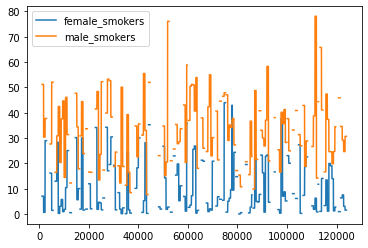

In [ ]:
column_set=['continent','female_smokers','male_smokers']
List_of_Smokers=df_Smokers[column_set]
List_of_Smokers.plot()

In [ ]:
df_Smokers.continent.unique()

array(['Asia', nan, 'Europe', 'Africa', 'North America', 'South America',
       'Oceania'], dtype=object)

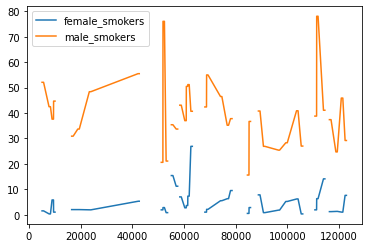

In [ ]:
row_set_asia=df_Smokers['continent']=="Asia"
List_of_Smokers_asia=df_Smokers[row_set_asia]
List_of_Smokers_asia=List_of_Smokers_asia[column_set]
List_of_Smokers_asia.plot()

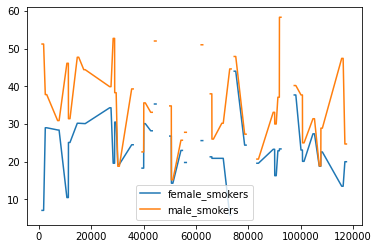

In [ ]:
row_set_europe=df_Smokers['continent']=="Europe" 
#pandas_dataframe.rename(columns={'column_name_to_change':'new_name'})
List_of_Smokers_europe=df_Smokers[row_set_europe]
List_of_Smokers_europe=List_of_Smokers_europe[column_set]

List_of_Smokers_europe.plot()
#df_Smokers[row_set, column_set]

In [ ]:
frames=[List_of_Smokers_asia, List_of_Smokers_europe]
merged_df=pd.concat(frames)

In [ ]:
merged_df.describe()

,female_smokers,male_smokers
count,47078.000000,47078.000000
mean,14.331055,37.494445
std,11.351765,11.910937
min,0.300000,15.200000
25%,2.800000,28.900000
50%,14.100000,37.400000
75%,23.300000,44.700000
max,44.000000,78.100000


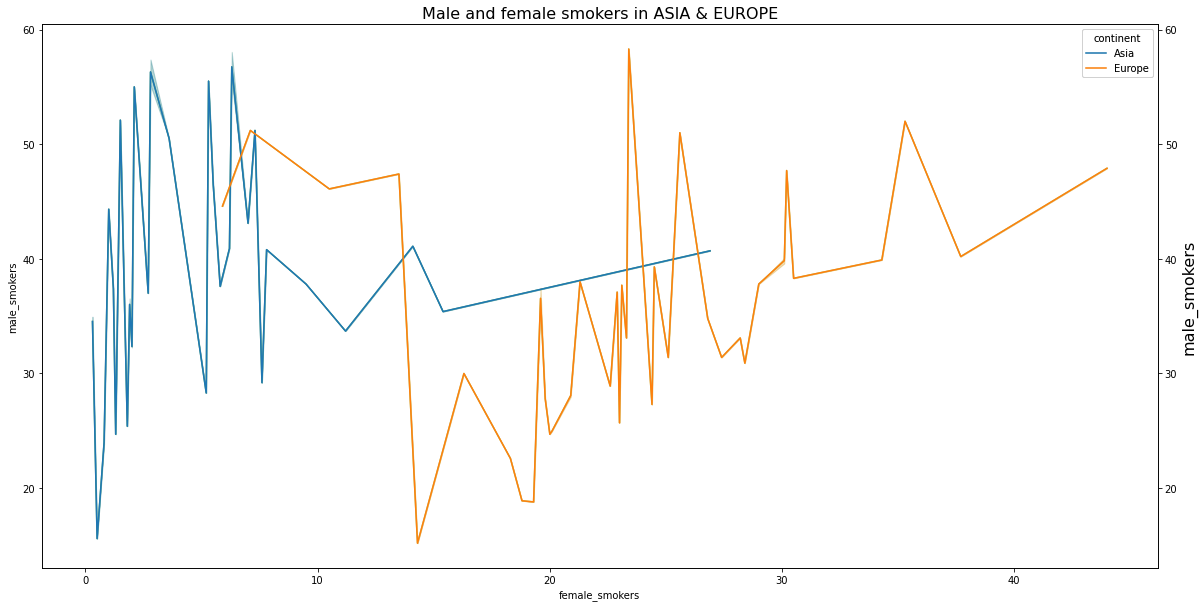

In [ ]:
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.set_title('Male and female smokers in ASIA & EUROPE', fontsize=16)
ax1 = sns.lineplot(x='female_smokers', y='male_smokers', data =merged_df, palette='summer', hue='continent')
ax1.tick_params(axis='x')
ax2 = ax1.twinx()
ax2.set_ylabel('male_smokers', fontsize=16)
ax2 = sns.lineplot(x='female_smokers', y='male_smokers', data =merged_df, sort=True, color=color, hue='continent')
ax2.tick_params(axis='y')
plt.show()



[back to the top](#main)
<a id='Q2' name='Q2'></a>
## 2. ~Question 2~? 

~Code and observations of the question goes here, as many cells as necessary.~

[back to the top](#main)
<a id='Q3' name='Q3'></a>
## 3. ~Question 3~? 

~Code and observations of the question goes here, as many cells as necessary.~